In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'		 GA_Image_Classification   Plants_dataset
 dataset_male_female		 GoldFish
 fish_detection_classification	'My Drive'


In [ ]:
%cd '/content/gdrive/MyDrive/fish_detection_classification'

/content/gdrive/MyDrive/fish_detection_classification


In [ ]:
data_dir = '/content/gdrive/MyDrive/fish_detection_classification'

data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 665 files belonging to 9 classes.


In [ ]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [ ]:
height = 228
width = 228
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [ ]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 535 images belonging to 9 classes.
Found 130 images belonging to 9 classes.


In [ ]:
num_classes = len(data.class_names)
print('.... Number of Classes : {0} ....'.format(num_classes))

.... Number of Classes : 9 ....


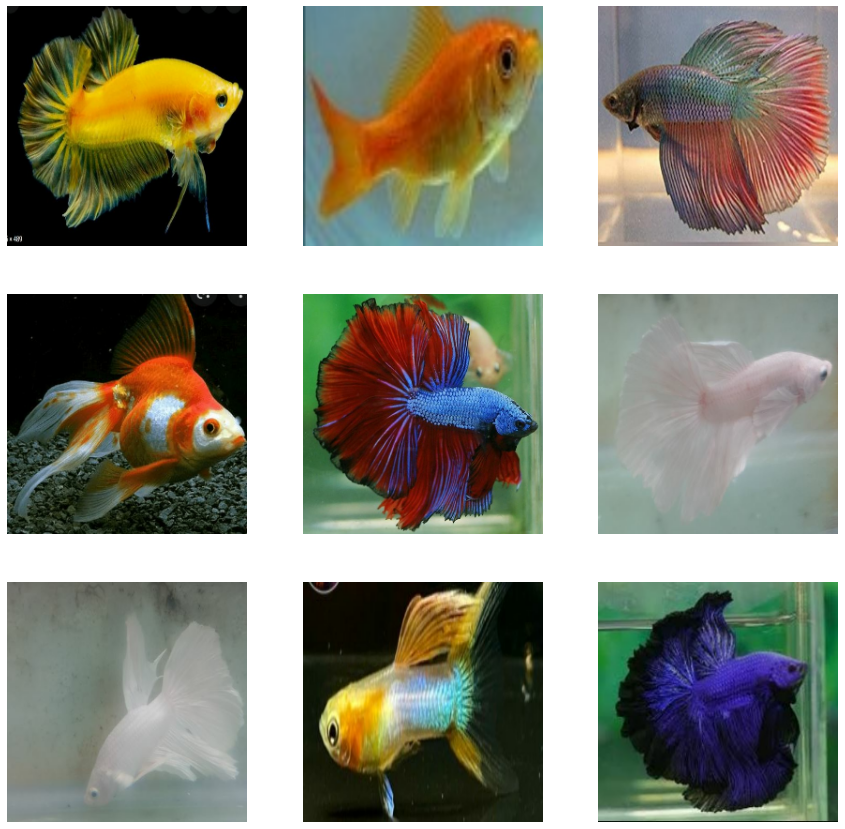

In [ ]:
def show_img(data):
    plt.figure(figsize=(15,15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

show_img(data)

In [ ]:
pre_trained = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape, pooling='avg')

for layer in pre_trained.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
x = pre_trained.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 228, 228, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 113, 113, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 113, 113, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size

history = model.fit_generator(train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = val_data,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = 18,
                    verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/18
16/16 [==============================] - 93s 5s/step - loss: 1.8658 - accuracy: 0.5706 - val_loss: 1.5216 - val_accuracy: 0.6172
Epoch 2/18
16/16 [==============================] - 11s 670ms/step - loss: 0.9187 - accuracy: 0.7893 - val_loss: 2.3209 - val_accuracy: 0.5938
Epoch 3/18
16/16 [==============================] - 11s 685ms/step - loss: 0.6440 - accuracy: 0.8270 - val_loss: 1.4707 - val_accuracy: 0.6406
Epoch 4/18
16/16 [==============================] - 10s 658ms/step - loss: 0.6272 - accuracy: 0.8469 - val_loss: 1.6214 - val_accuracy: 0.6562
Epoch 5/18
16/16 [==============================] - 11s 673ms/step - loss: 0.6021 - accuracy: 0.8489 - val_loss: 1.3846 - val_accuracy: 0.6797
Epoch 6/18
16/16 [==============================] - 11s 667ms/step - loss: 0.5761 - accuracy: 0.8668 - val_loss: 1.2009 - val_accuracy: 0.7031
Epoch 7/18
16/16 [==============================] - 11s 692ms/step - loss: 0.6157 - accuracy: 0.8648 - val_loss: 0.9931 - val_accuracy: 0.8047
Ep

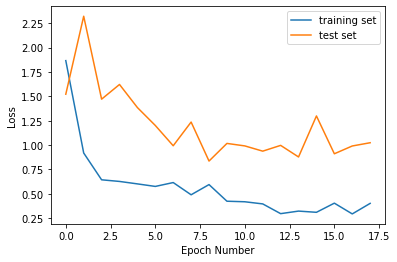

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

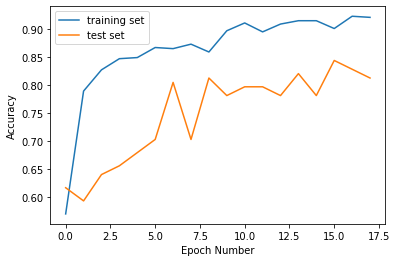

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
model_name = 'fish_model.h5'
model.save(model_name, save_format='h5')

In [ ]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [ ]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    prob = prediction
    print(prob)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

[[8.1086840e-04 9.9914122e-01 1.2722949e-05 1.4096529e-10 4.4021487e-08
  2.4910266e-06 2.4318408e-05 2.6405613e-07 8.0182208e-06]]


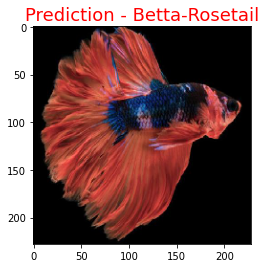

In [ ]:
predict_image('/content/gdrive/MyDrive/fish_detection_classification/Betta-Rosetail/25.JPG', model)

[[7.7260367e-09 2.5876390e-11 2.9571498e-11 2.2976778e-11 8.1698866e-12
  6.2426567e-13 2.7424425e-08 3.1258765e-05 9.9996865e-01]]


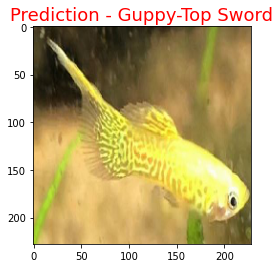

In [ ]:
predict_image('/content/gdrive/MyDrive/fish_detection_classification/Guppy-Top sword/16.JPG', model)

[[1.3683654e-08 2.2079161e-07 1.6523610e-06 1.4282491e-04 3.4613739e-05
  1.3024427e-04 9.6811184e-11 9.9969053e-01 3.6681136e-09]]


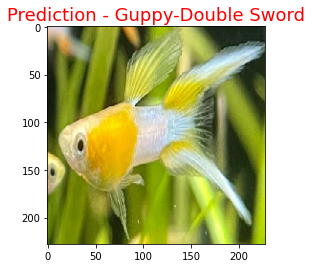

In [ ]:
predict_image('/content/gdrive/MyDrive/fish_detection_classification/Guppy-Double sword/32.JPG', model)

[[1.1186032e-08 6.7710650e-11 6.7082728e-10 5.7445686e-14 2.3838243e-06
  1.1048011e-09 9.9999762e-01 8.9992600e-09 7.7755372e-12]]


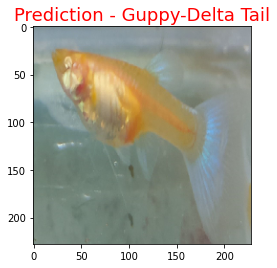

In [ ]:
predict_image('/content/gdrive/MyDrive/fish_detection_classification/Guppy-Delta tail/IMG (122).jpg', model)

[[7.3576527e-11 2.5701228e-09 3.7575742e-07 7.2257818e-11 9.9860090e-01
  1.3727926e-03 2.2271827e-11 1.6897897e-05 9.0622934e-06]]


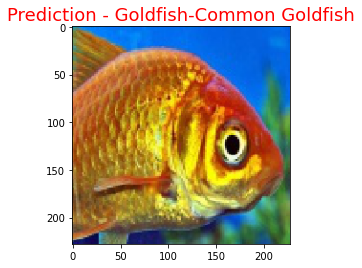

In [ ]:
predict_image('/content/gdrive/MyDrive/fish_detection_classification/GoldFish-Common goldfish/606O8MLX8ERR.jpg', model)

[[5.0185093e-07 2.4996029e-06 2.8902437e-05 8.3940732e-01 2.7109929e-03
  2.4526187e-03 7.4083925e-07 1.5539140e-01 5.0516487e-06]]


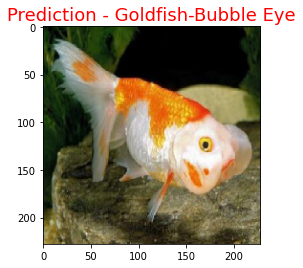

In [ ]:
predict_image('/content/gdrive/MyDrive/fish_detection_classification/GoldFish-Bubble eye/29.JPG', model)

[[9.4091604e-07 3.0907739e-09 9.9999857e-01 1.0181434e-08 1.6639319e-13
  3.7811182e-07 8.9513336e-13 1.8597936e-10 1.0399136e-07]]


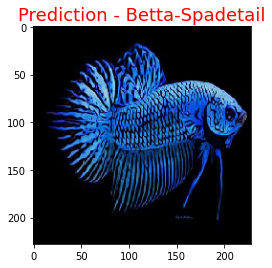

In [ ]:
predict_image('/content/gdrive/MyDrive/fish_detection_classification/Betta-Spadetail/26.JPG', model)